<a href="https://colab.research.google.com/github/sikha2552/Python_Imageprocessing_-Datacamp-/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3**

### **Image restoration, Noise, Segmentation and Contours**

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.restoration import inpaint

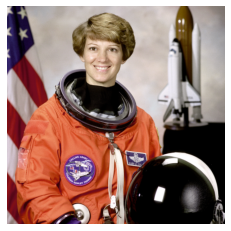

In [2]:
im=data.astronaut()
plt.imshow(im);plt.axis('off');plt.show()

<ipython-input-3-db628d33d467>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(im.shape[:2], dtype=np.bool)


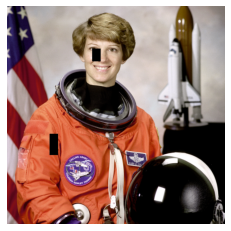

In [3]:
# Make a defected image

import numpy as np
mask = np.zeros(im.shape[:2], dtype=np.bool)
mask[100:130, 200:220] = True
mask[300:350, 100:120] = True

im[mask] = 0

plt.imshow(im)
plt.axis('off')
plt.show()

<ipython-input-4-dbe54fed663b>:1: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  reconstruct=inpaint.inpaint_biharmonic(im, mask, multichannel=True)


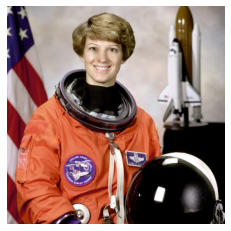

In [4]:
reconstruct=inpaint.inpaint_biharmonic(im, mask, multichannel=True)
plt.imshow(reconstruct)
plt.axis('off')
plt.show()

## Removing Logos

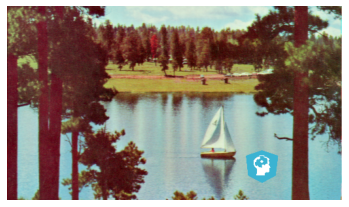

In [5]:
image_with_logo=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter3/4.2.06_w_logo_2_2.png')
plt.imshow(image_with_logo)
plt.axis('off')
plt.show()

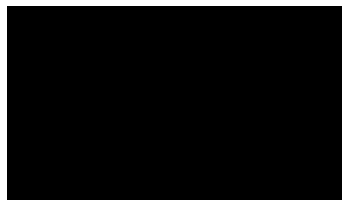

In [6]:
#create a mask as the same size as the image
from skimage.restoration import inpaint
mask = np.zeros(image_with_logo.shape[:-1])
plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()

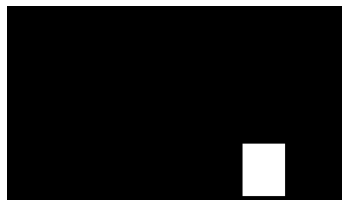

In [7]:
  # Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1
plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()

In [8]:
# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, mask,  multichannel=True)

<ipython-input-8-799ecce7f1e6>:2: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, mask,  multichannel=True)


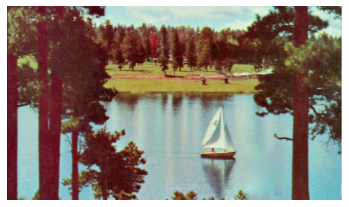

In [9]:
plt.imshow(image_logo_removed)
plt.axis('off')
plt.show()

## Noise

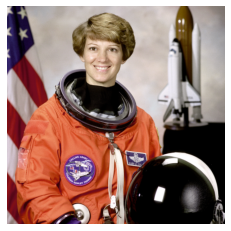

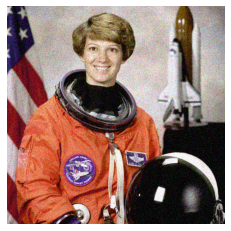

In [10]:
from skimage.util import random_noise
im=data.astronaut()
plt.imshow(im);plt.axis('off');plt.show()
#Add noise
nosie_image=random_noise(im)
plt.imshow(nosie_image);plt.axis('off');plt.show()


There are different types of denoising algorithms available:

1. Total Variation (TV) denoising.

2. Bilateral (Smooth images while Preserving edges) : Replace every pixel with weighted average of neighboring pixels.

3. Wavelet Filter

4. Non-local Means Denoising



In [12]:
#Total Variation
from skimage.restoration import denoise_tv_chambolle
denoise_tv=denoise_tv_chambolle(nosie_image, weight=0.01, multichannel=True) #Weight makes the image smoother


<ipython-input-12-fa264a6a60da>:3: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_tv=denoise_tv_chambolle(nosie_image, weight=0.01, multichannel=True) #Weight makes the image smoother


In [14]:
#Bilatera
from skimage.restoration import denoise_bilateral
denoise_bilateral=denoise_bilateral(nosie_image,multichannel=True)

<ipython-input-14-c7a2a60b2a4b>:3: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_bilateral=denoise_bilateral(nosie_image,multichannel=True)


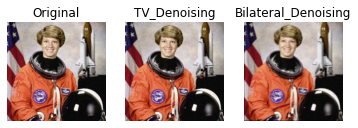

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(nosie_image)
ax[0].set_title('Original')
ax[1].imshow(denoise_tv)
ax[1].set_title('TV_Denoising')
ax[2].imshow(denoise_bilateral)
ax[2].set_title('Bilateral_Denoising')

for a in ax:
    a.axis('off')

### Segmentation, Super Pixels

Text(0.5, 1.0, 'Super Pixels average color')

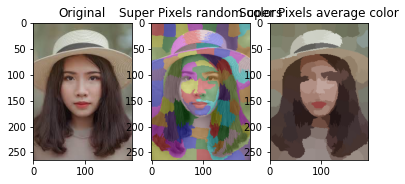

In [42]:
from skimage.segmentation import slic
from skimage.color import label2rgb
#import image
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter3/chinese.jpg')
fig,ax=plt.subplots(nrows=1,ncols=3)
ax[0].imshow(im)
ax[0].set_title('Original')
segments1=slic(im,n_segments=100)
seg_out1=label2rgb(segments1,im)
ax[1].imshow(seg_out1)
ax[1].set_title('Super Pixels random colors')
segments2=slic(im)
seg_out2=label2rgb(segments2,im,kind='avg')
ax[2].imshow(seg_out2)
ax[2].set_title('Super Pixels average color')

### Finding Contours

Contour is the outline of objects present in the image. This can be used to count the number of objects present, area etc. The steps involved in calculating the contours include:

1. Convert the color image to gray using the rgb2gray function of skimge
2. Convert the grayscale image to binary using the thresholding method available in the filter module of skimage.
3. use the find_contour method avaialable in measure of skimage

Text(0.5, 1.0, 'Contours')

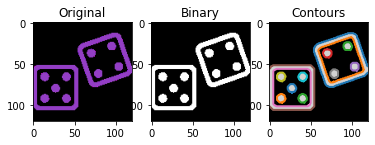

In [59]:
from skimage import measure
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
im=plt.imread('/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Python4Imgprocessing_Datacamp/Chapter3/dices.png')
im=im[:,:,:3]
fig,ax=plt.subplots(1,3)
ax[0].imshow(im)
ax[0].set_title('Original')
#Convert rgb to gray
im_gray=rgb2gray(im)
#Conver to binary
T=threshold_otsu(im_gray)
BW=im_gray>T
ax[1].imshow(BW,cmap='gray')
ax[1].set_title('Binary')
#Find contours
contours=measure.find_contours(BW,0.8)
for contour in contours:
    ax[2].plot(contour[:, 1], contour[:, 0], linewidth=2)
ax[2].imshow(im_gray, cmap='gray')
ax[2].set_title('Contours')

In [60]:
for contour in contours:
  print(contour.shape)

(255, 2)
(221, 2)
(43, 2)
(45, 2)
(41, 2)
(173, 2)
(181, 2)
(43, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)


In [70]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

In [69]:
#Count the dots in a dice's image
#1.Create a list with all contour's shapes as shape_contours.
shape_contours=[cnt.shape[0] for cnt in contours]
# Set 50 as the maximum size of the dots shape
max_dots_shape = 50
# Count dots in contours excluding bigger than dots size
dots_contours= [cnt for cnt in contours if np.shape(cnt)[0]<50]
# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

Dice's dots number: 9. 


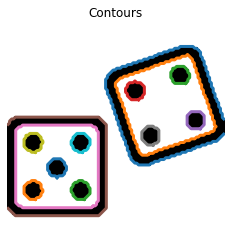

In [71]:
show_image_contour(BW, contours)

In [63]:
shape_contours

[255, 221, 43, 45, 41, 173, 181, 43, 45, 45, 45, 45, 45]

In [68]:
dots_contours

[array([[ 33.2,  98. ],
        [ 33.2,  97. ],
        [ 33.2,  96. ],
        [ 33.2,  95. ],
        [ 33.2,  94. ],
        [ 33.2,  93. ],
        [ 33.2,  92. ],
        [ 33. ,  91.8],
        [ 32.2,  91. ],
        [ 32. ,  90.8],
        [ 31. ,  90.8],
        [ 30.2,  90. ],
        [ 30. ,  89.8],
        [ 29. ,  89.8],
        [ 28. ,  89.8],
        [ 27. ,  89.8],
        [ 26.8,  90. ],
        [ 26. ,  90.8],
        [ 25. ,  90.8],
        [ 24.8,  91. ],
        [ 24.8,  92. ],
        [ 24. ,  92.8],
        [ 23.8,  93. ],
        [ 23.8,  94. ],
        [ 23.8,  95. ],
        [ 23.8,  96. ],
        [ 23.8,  97. ],
        [ 24. ,  97.2],
        [ 24.8,  98. ],
        [ 25. ,  98.2],
        [ 25.8,  99. ],
        [ 26. ,  99.2],
        [ 27. ,  99.2],
        [ 27.8, 100. ],
        [ 28. , 100.2],
        [ 29. , 100.2],
        [ 30. , 100.2],
        [ 30.2, 100. ],
        [ 31. ,  99.2],
        [ 32. ,  99.2],
        [ 32.2,  99. ],
        [ 33. , 